# Rusty Bargain 

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche.

# Tabla de contenido


1. [Introducción](#Introducción)

    1.1 [Objetivo general](#Objetivo-general)
    
    1.2 [Objetivos particulares](#Objetivos-particulares)
    
    
2. [Descripción de los datos](#Descripción-de-los-datos)

    2.1 [Datos utilizados como características](#Datos-utilizados-como-características)
    
    2.2 [Datos utilizados como objetivo](#Datos-utilizados-como-objetivo)


3. [Preprocesamiento de datos](#Preprocesamiento-de-datos)

    3.1 [Limpieza de datos](#Limpieza-de-datos)
    
    3.2 [Preparación de datos](#Preparación-de-datos)


4. [Entrenamiento del modelo](#Entrenamiento-del-modelo)

    4.1 [Entrenamiento con modelo de regresión lineal](#Entrenamiento-con-modelo-de-regresión-lineal)
    
    4.2 [Entrenamiento con regresión lineal con descenso de gradiente estocástico](#Entrenamiento-con-regresión-lineal-con-descenso-de-gradiente-estocástico)
    
    4.3 [Entrenamiento de modelo mediante LightGBM](#Entrenamiento-de-modelo-mediante-LightGBM)


5. [Análisis del modelo](#Análisis-del-modelo)

    5.1 [Analizando pruebas con el modelo de regresión lineal SGDL](#Analizando-pruebas-con-el-modelo-de-regresión-lineal-SGDL)
    
    5.2 [Analizando pruebas con el modelo de regresión lineal GBDT](#Analizando-pruebas-con-el-modelo-de-regresión-lineal-GBDT)  
    
    
6. [Conclusión](#Conclusión)


7. [Lista de control](#Lista-de-control)

## Introducción

### Objetivo general

- Desarrollar un modelo de predicción para evaluar el valor en el mercado sobre las característcias del coche de cualquier cliente usuario para la nueva app de la empresa.

### Objetivos particulares

- Que el modelo cumpla con una alta calidad de la predicción.
- Obtener una buena velocidad en la predicción.
- Que el tiempo requerido para el entrenamiento sea el menor posible.

In [1]:
# instalar librerías que se van a utilizar
!pip install lightgbm

In [2]:
# importar librerias que se van a utilizar

import pandas as pd
import numpy as np

## para la imputación de valores ausentes
#from sklearn.impute import SimpleImputer

## para la estandarización de datos
from sklearn.preprocessing import StandardScaler

## para la división y subconjunto de datos (train y test)
from sklearn.model_selection import train_test_split

## para importar métricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error

## para medir el tiempo que tarda en ejecutarse un proceso
import time

## para hacer modelos de aprendizaje GBDT
import lightgbm as lgb

## para crear modelo de regresión lineal
from sklearn.linear_model import LinearRegression

## para graficar
import matplotlib.pyplot as plt

In [3]:
# importar la base de datos que se va a utilizar

try:
    df = pd.read_csv('/datasets/car_data.csv')
except:
    df = pd.read_csv('car_data.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [6]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


## Descripción de los datos

### Datos utilizados como características

- **DateCrawled** — *fecha en la que se descargó el perfil de la base de datos*
-  **VehicleType** — *tipo de carrocería del vehículo*
- **RegistrationYear** — *año de matriculación del vehículo*
- **Gearbox** — *tipo de caja de cambios*
- **Power** — *potencia (CV)*
- **Model** — *modelo del vehículo*
- **Mileage** — *kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)*
- **RegistrationMonth** — *mes de matriculación del vehículo*
- **FuelType** — *tipo de combustible*
- **Brand** — *marca del vehículo*
- **NotRepaired** — *vehículo con o sin reparación*
- **DateCreated** — *fecha de creación del perfil*
- **NumberOfPictures** — *número de fotos del vehículo*
- **PostalCode** — *código postal del propietario del perfil (usuario)*
- **LastSeen** — *fecha de la última vez que el usuario estuvo activo*


### Datos utilizados como objetivo

- **Price** — *precio (en euros)*

## Preprocesamiento de datos
### Limpieza de datos
En el proceso de disminuir la cantidad de datos con los que se estará trabajando y para una mayor claridad es la razón por la cual eliminaremos algunas columnas que nos estarán considerando de interés por motivos racionales.

In [7]:
# eliminando columnas de poco valor para el entrenamiento del modelo
low_value_features = ['DateCrawled','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen']
df.drop(low_value_features, axis=1, inplace=True)

In [8]:
# aplicando el formato "sneake_case" a los nombres de las columnas
rename_columns = {
    'Price' : 'price',
    'VehicleType' : 'vehicle_type',
    'RegistrationYear' : 'registration_year',
    'Gearbox' : 'gearbox',
    'Power' : 'power',
    'Model' : 'model',
    'Mileage' : 'mileage',
    'FuelType' : 'fuel_type',
    'Brand' : 'brand',
    'NotRepaired' : 'not_repaired'
}
df.rename(columns=rename_columns, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354369 non-null  int64 
 1   vehicle_type       316879 non-null  object
 2   registration_year  354369 non-null  int64 
 3   gearbox            334536 non-null  object
 4   power              354369 non-null  int64 
 5   model              334664 non-null  object
 6   mileage            354369 non-null  int64 
 7   fuel_type          321474 non-null  object
 8   brand              354369 non-null  object
 9   not_repaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


Se observa que la tipografía en cada uno de los datos es la correcta por lo que no es necesario hacer correcciones de carácter tipográfico.

In [10]:
# calculo de porcentaje de pérdida en caso de eliminar los valores ausentes
df_withoutna = (df.dropna().shape[0])/(df.shape[0])
print(f'La cantidad de observaciones que quedan después de eliminar los valores ausentes es de {df_withoutna :.1%}.')

La cantidad de observaciones que quedan después de eliminar los valores ausentes es de 69.4%.


Debido a la alta pérdida de datos que se tendrían la estrategia que seguiremos será la de imputar valores ausentes, si bien genera un pequeños sezgo de a los posibles valores reales, la información que se evita perder brindará mejores pronósticos para el entrenamiento de nuestros modelos.

In [11]:
# observar las estadísticas primarias de las columnas con valores cuantitativos
df.describe()

,price,registration_year,power,mileage
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


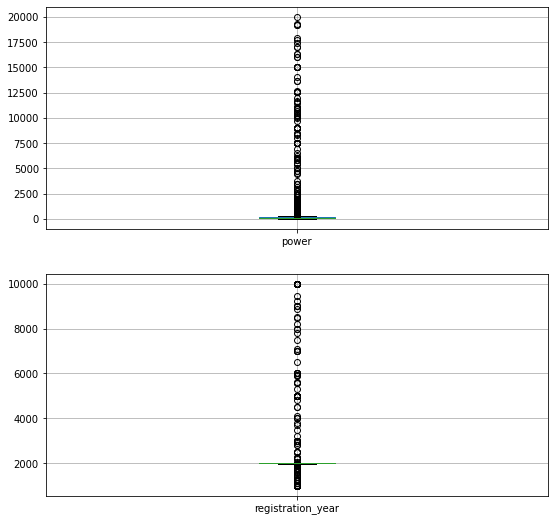

In [12]:
## solucionando el comentario anterior

plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
df.boxplot(column = ['power'])
plt.subplot(2,1,2)
df.boxplot(column=['registration_year'])
plt.show()

Existen muchos valores atípicos por lo cual se procederá a eliminarlos

In [13]:
# Creamos una función que elimine valores atípicos dependientes de columna

def drop_av(df, column):
    temp = df[column]
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    bottom_limit = Q1-(1.5*IQR)
    upper_limit = Q3+(1.5*IQR)
    df = df.query('@temp > @bottom_limit and @temp < @upper_limit')
    return df

In [14]:
# se ejecuta la función anterior
df = drop_av(df, 'power')
df = drop_av(df, 'registration_year')

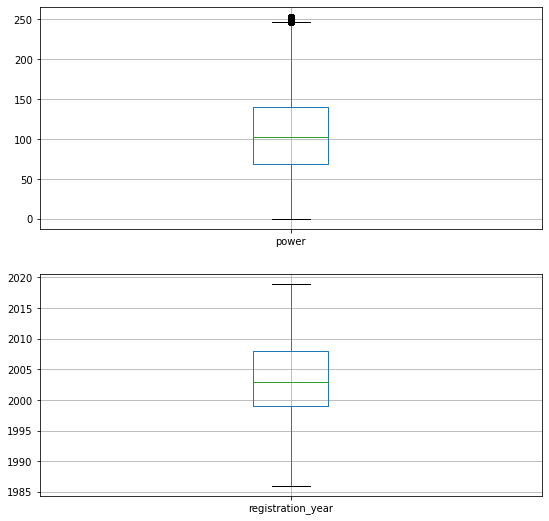

In [15]:
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
df.boxplot(column = ['power'])
plt.subplot(2,1,2)
df.boxplot(column=['registration_year'])
plt.show()

Se observa que las características con valores cuantitativos no contienen valores ausentes sino que éstos se encuentran en las columnas de las características con valores cualitativos los cuales los pudiéramos tratar con OHE. Existen algunas columnas como `model` o `brand` que provocarán una gran cantidad de columnas, sin embargo, es necesario que la base de datos reconozca estas características con gran interés ya que una buena parte de este valor tendrá un gran peso en la predicción del precio.

In [16]:
## corrigiendo el comentario anterior
data = df.fillna('unknown')

In [17]:
data = pd.get_dummies(df, drop_first=True)

### Preparación de datos

In [18]:
# se van a manejar lo datos de manera estandarziada
to_std = ['registration_year','power','mileage']
scaler = StandardScaler()
scaler.fit(data[to_std])
data_scaled = data
data_scaled[to_std]= scaler.transform(data_scaled[to_std])
data_scaled.head()

,price,registration_year,power,mileage,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_yes
0,480,-1.654579,-1.826334,0.569253,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,18300,1.160785,1.539047,-0.100732,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,0.065921,1.060809,-0.100732,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1500,-0.403306,-0.497894,0.569253,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,3600,0.691557,-0.604169,-1.038711,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
# crear el conjunto de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop(['price'], axis=1), data_scaled['price'], random_state=300623, test_size=0.25)

## Entrenamiento del modelo 
### Entrenamiento con modelo de regresión lineal

In [20]:
t0 = time.time()
rl_model = LinearRegression()
rl_model.fit(X_train, y_train)
y_pred = rl_model.predict(X_test)
t1 = time.time()
total_time = t1 - t0
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(f' r2_score: {r2_score(y_pred, y_test)}.')
print(f' RECM: {rmse}.')
print(f' Tiempo total de entrenamiento: {total_time}.')

 r2_score: 0.47567845191451974.
 RECM: 2565.024252882704.
 Tiempo total de entrenamiento: 19.631128311157227.


Se puede observar que el modelo es extremandamente deficiente.

### Entrenamiento con regresión lineal con descenso de gradiente estocástico

In [21]:
class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size, reg_weight):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_weight = reg_weight
    
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.zeros(X.shape[1]).astype('float64')
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = (2 * X_batch.T.dot(X_batch.dot(w) - y_batch)/ X_batch.shape[0]).astype('float64')
                
                reg = 2 * w.copy()
                reg[0] = 0
                
                gradient += self.reg_weight * reg
                
                w -= self.step_size*gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [22]:
## entrenamineto del modelo SGDRL
    
t0 = time.time()    
model = SGDLinearRegression(0.01, 10, 100, 0)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
t1 = time.time()
mse = mean_squared_error(pred_test, y_test)
rmse = np.sqrt(mse)
process_time = (t1-t0)
print(f' métrica r2_score: {r2_score(y_test, pred_test).round(4)}.')
print(f' RECM: {rmse}.')
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

 métrica r2_score: 0.6433.
 RECM: 2610.15363570392.
Tiempo de entrenamiento y predicción es:59.216625928878784 segundos.


### Entrenamiento de modelo mediante LightGBM

In [23]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [24]:
## especificando parámetros a utilizar para lightgbm

parameters = {
    'force_row_wise' : True,
    'is_unbalance' : True,
    'boosting_type' : 'gbdt',
    'verbosity' : -1,
    'num_leaves' : 150,
    'learning_rate' : 0.3,
    'metric' : ['rmse', 'auc'],
    'random_state' : 1266,
    'subsample_for_bin' : 10000,
    'n_estimators' : 300
}

In [25]:
callbacks = [lgb.early_stopping(10)]
t0 = time.time()
model_gbm = lgb.train(parameters,                      
                      train_data,
                      valid_sets = test_data,
                      num_boost_round =1000,
                      callbacks = callbacks,
                     )
predict = model_gbm.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[72]	valid_0's rmse: 1600.38	valid_0's auc: 0.702606
Tiempo de entrenamiento y predicción es:12.503230571746826 segundos.


El proceso anterior si bien tiene un `RECM` excelente junto con un `AUC` deseable, el tiempo de entrenamiento con los recursos de procesamiento utilizado es relativamente  grande, alrededor de **8.6 min**, por lo que realizar un mejor boosting al probar con los hiperparámetros correctos debe de ser deseable.

In [26]:
mse = mean_squared_error(predict, y_test)
rmse = np.sqrt(mse)
print(f'Métrica r2_score: {r2_score(y_test, predict).round(4)}.')
print(f'RECM: {rmse}.')

Métrica r2_score: 0.8659.
RECM: 1600.3756623334853.


## Análisis del modelo

### Analizando pruebas con el modelo de regresión lineal SGDL

In [27]:
t0 = time.time()
model =SGDLinearRegression(0.01, 10, 100, 0.1)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(r2_score(y_test, pred_test).round(4))
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

0.5608
Tiempo de entrenamiento y predicción es:58.17849516868591 segundos.


In [28]:
t0 = time.time()
model =SGDLinearRegression(0.01, 10, 100, 1)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(r2_score(y_test, pred_test).round(4))
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

0.4166
Tiempo de entrenamiento y predicción es:59.191253423690796 segundos.


In [29]:
t0 = time.time()
model =SGDLinearRegression(0.01, 10, 100, 10)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(r2_score(y_test, pred_test).round(4))
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

0.1028
Tiempo de entrenamiento y predicción es:58.711695432662964 segundos.


In [30]:
t0 = time.time()
model =SGDLinearRegression(0.1, 10, 1000, 0)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(r2_score(y_test, pred_test).round(4))
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

0.6432
Tiempo de entrenamiento y predicción es:19.48103976249695 segundos.


### Analizando pruebas con el modelo de regresión lineal GBDT

Así nos referimos al modelo realizado con las herramientas de LightGBM en el cual se utilizó potenciación del gradiente con árboles de decisión.
Se puede observar que se obtiene el mejor rendimiento en el modelo.

In [31]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [32]:
callbacks = [lgb.early_stopping(10)]
t0 = time.time()
model_gbm_2 = lgb.LGBMClassifier()
model_gbm_2 = lgb.train(parameters,
                      train_data,
                      valid_sets = test_data,
                      num_boost_round =500,
                      callbacks = callbacks
                     )
predict = model_gbm_2.predict(X_test)
t1 = time.time()
process_time = (t1-t0)
print(f'Tiempo de entrenamiento y predicción es:{process_time} segundos.')

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[72]	valid_0's rmse: 1600.38	valid_0's auc: 0.702606
Tiempo de entrenamiento y predicción es:13.01892352104187 segundos.


In [33]:
mse = mean_squared_error(predict, y_test)
rmse = np.sqrt(mse)
print(f'Métrica r2_score: {r2_score(y_test, predict).round(4)}.')
print(f'RECM: {rmse}.')

Métrica r2_score: 0.8659.
RECM: 1600.3756623334853.


<!-- La métrica de r2_score es buena (**0.859**) con un RECM = **1697.25** el cual es un error muy por debajo de los primeros modelos de regresión lineal que se utilizaron  -->

In [34]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [35]:
# modificando algunos de los parámetros del modelo que tuvo mejor rendimiento (model_gbm)

parameters = {
    'force_row_wise' : True,
    'is_unbalance' : True,
    'boosting'  : 'gbdt',
    'verbosity' : -1,
    'num_leaves' : 100,
    'learning_rate' : 0.5,
    'metric' : ['rmse', 'auc']}

In [36]:
callbacks = [lgb.early_stopping(10)]
t0 = time.time()
model_gbm = lgb.LGBMRegressor()
model_gbm.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0
print(f'Tiempo total de entrenamiento:{total_time}')
predict = model_gbm.predict(X_test)
mse = mean_squared_error(predict, y_test)
rmse = np.sqrt(mse)
print(f'Métrica r2_score: {r2_score(y_test, predict).round(4)}.')
print(f'RECM: {rmse}.')

Tiempo total de entrenamiento:6.281378746032715
Métrica r2_score: 0.8445.
RECM: 1723.3256942827438.


Aquí ya se tiene una reducción en la velocidad de entrenamiento del modelo sin comprometer el rendimiento de éste.